## Import modules

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Loading the dataset

In [2]:
df=pd.read_csv('bank-loan.csv')
df.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


In [3]:
df.describe()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000
mean,35.029412,1.710588,8.565882,8.371765,46.675294,10.171647,1.576805,3.078789,0.261429
std,8.041432,0.927784,6.777884,6.895016,38.543054,6.719441,2.125840,3.398803,0.439727
min,20.000000,1.000000,0.000000,0.000000,13.000000,0.100000,0.011696,0.045584,0.000000
25%,29.000000,1.000000,3.000000,3.000000,24.000000,5.100000,0.382176,1.045942,0.000000
50%,34.000000,1.000000,7.000000,7.000000,35.000000,8.700000,0.885091,2.003243,0.000000
75%,41.000000,2.000000,13.000000,12.000000,55.750000,13.800000,1.898440,3.903001,1.000000
max,56.000000,5.000000,33.000000,34.000000,446.000000,41.300000,20.561310,35.197500,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       850 non-null    int64  
 1   ed        850 non-null    int64  
 2   employ    850 non-null    int64  
 3   address   850 non-null    int64  
 4   income    850 non-null    int64  
 5   debtinc   850 non-null    float64
 6   creddebt  850 non-null    float64
 7   othdebt   850 non-null    float64
 8   default   700 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 59.9 KB


## Preprocessing the dataset

- Missing Values Treatment
- Outlier Analysis

In [5]:
#checking missing values
df.isnull().sum()

age           0
ed            0
employ        0
address       0
income        0
debtinc       0
creddebt      0
othdebt       0
default     150
dtype: int64

In [6]:
# Droping missing value rows
df=df.dropna()
df.isnull().sum()

age         0
ed          0
employ      0
address     0
income      0
debtinc     0
creddebt    0
othdebt     0
default     0
dtype: int64

In [7]:
print(df.shape)

(700, 9)


In [8]:
# outlier analysis
df.describe(percentiles=[.25,0.5,0.75,0.90,0.95])

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,34.860000,1.722857,8.388571,8.278571,45.601429,10.260571,1.553553,3.058209,0.261429
std,7.997342,0.928206,6.658039,6.824877,36.814226,6.827234,2.117197,3.287555,0.439727
min,20.000000,1.000000,0.000000,0.000000,14.000000,0.400000,0.011696,0.045584,0.000000
25%,29.000000,1.000000,3.000000,3.000000,24.000000,5.000000,0.369059,1.044178,0.000000
50%,34.000000,1.000000,7.000000,7.000000,34.000000,8.600000,0.854869,1.987567,0.000000
75%,40.000000,2.000000,12.000000,12.000000,55.000000,14.125000,1.901955,3.923065,1.000000
90%,46.000000,3.000000,18.000000,18.000000,82.000000,19.610000,3.621504,7.036180,1.000000
95%,49.000000,4.000000,21.050000,22.000000,113.000000,23.800000,5.098264,9.501648,1.000000
max,56.000000,5.000000,31.000000,34.000000,446.000000,41.300000,20.561310,27.033600,1.000000


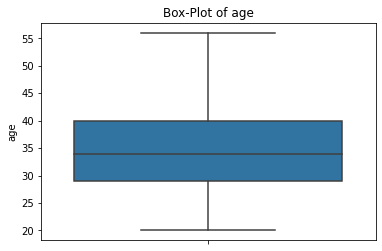

In [9]:
sns.boxplot(y = "age",data=df)
plt.title("Box-Plot of age")
plt.show()

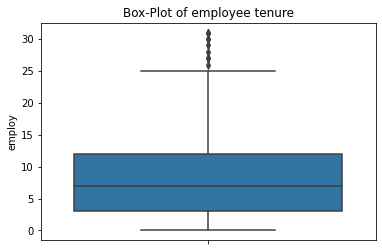

In [10]:
sns.boxplot(y = "employ",data=df)
plt.title("Box-Plot of employee tenure")
plt.show()

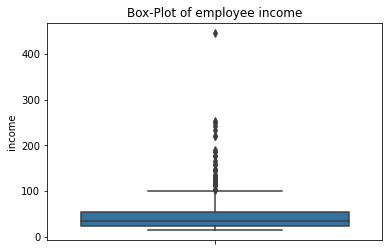

In [11]:
sns.boxplot(y = "income",data=df)
plt.title("Box-Plot of employee income")
plt.show()

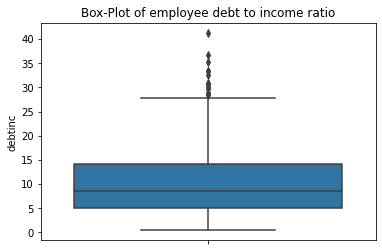

In [12]:
sns.boxplot(y = "debtinc",data=df)
plt.title("Box-Plot of employee debt to income ratio")
plt.show()

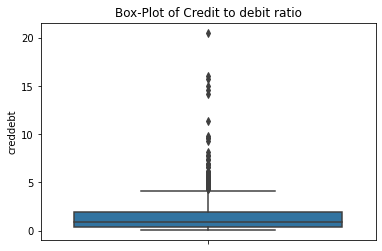

In [13]:
sns.boxplot(y = "creddebt",data=df)
plt.title("Box-Plot of Credit to debit ratio")
plt.show()

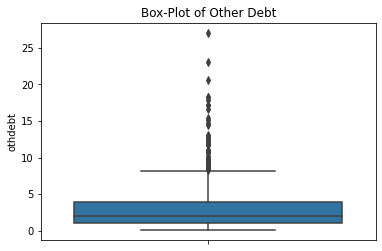

In [14]:
sns.boxplot(y = "othdebt",data=df)
plt.title("Box-Plot of Other Debt")
plt.show()

In [15]:
#Dealing with outlier
def outlier_capping(x):
    x = x.clip(upper=x.quantile(0.95))
    
    return(x)

In [16]:
#outlier treatment
df = df.apply(lambda x: outlier_capping(x))

In [17]:
df.describe(percentiles=[.25,0.5,0.75,0.90,0.95])

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,34.711429,1.715714,8.209643,8.112857,43.095714,10.042286,1.382384,2.845322,0.261429
std,7.690146,0.906523,6.216852,6.411060,25.967091,6.234776,1.386117,2.504717,0.439727
min,20.000000,1.000000,0.000000,0.000000,14.000000,0.400000,0.011696,0.045584,0.000000
25%,29.000000,1.000000,3.000000,3.000000,24.000000,5.000000,0.369059,1.044178,0.000000
50%,34.000000,1.000000,7.000000,7.000000,34.000000,8.600000,0.854869,1.987567,0.000000
75%,40.000000,2.000000,12.000000,12.000000,55.000000,14.125000,1.901955,3.923065,1.000000
90%,46.000000,3.000000,18.000000,18.000000,82.000000,19.610000,3.621504,7.036180,1.000000
95%,49.000000,4.000000,21.002500,22.000000,113.000000,23.800000,5.090913,9.498963,1.000000
max,49.000000,4.000000,21.050000,22.000000,113.000000,23.800000,5.098264,9.501648,1.000000


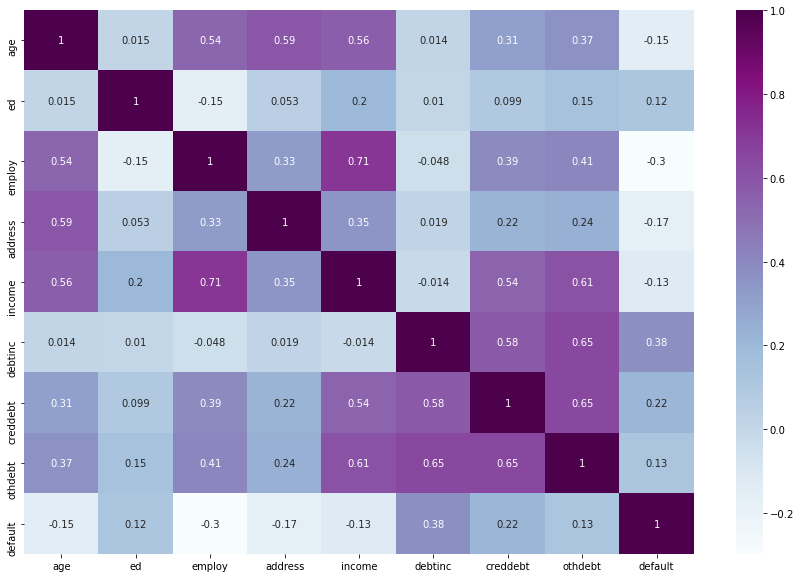

In [18]:
# checking correlation
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True, cmap="BuPu")

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Indicate which variables to compute VIF
X = df[['age','ed','employ', 'address', 'income', 'debtinc', 'creddebt', 'othdebt']]
# add intercept
X['intercept'] = 1
# Compute VIF
vif = pd.DataFrame()
vif["variables"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif

,variables,VIF
0,age,2.069008
1,ed,1.292872
2,employ,2.624197
3,address,1.549227
4,income,5.908874
5,debtinc,5.049334
6,creddebt,2.928049
7,othdebt,5.340459
8,intercept,41.554332


In [20]:
## performing the independent t test on numerical variables
from scipy import stats
tstats_df = pd.DataFrame()

for i in df:
    tstats = stats.ttest_ind(df.loc[df["default"] == 1,i],df.loc[df["default"] == 0, i],equal_var=False)
    temp = pd.DataFrame([i, tstats[0], tstats[1]]).T
    temp.columns = ['Variable Name', 'T-Statistic', 'P-Value']
    tstats_df = pd.concat([tstats_df, temp], axis=0, ignore_index=True)
    
tstats_df =  tstats_df.sort_values(by = "P-Value").reset_index(drop = True)
tstats_df

,Variable Name,T-Statistic,P-Value
0,default,inf,0
1,debtinc,9.95554,3.85688e-20
2,employ,-9.03873,7.73766e-18
3,creddebt,5.20625,3.90256e-07
4,address,-4.82342,2.07201e-06
5,age,-3.83057,0.0001557
6,income,-3.51615,0.000495008
7,othdebt,3.13998,0.00186546
8,ed,3.02788,0.00267847


## Exploratory Data Analysis

In [21]:
df.groupby('default').mean()

,age,ed,employ,address,income,debtinc,creddebt,othdebt
default,,,,,,,,
0.0,35.390716,1.651838,9.308704,8.752418,45.032882,8.629207,1.202825,2.658606
1.0,32.792350,1.896175,5.104645,6.306011,37.622951,14.034426,1.889663,3.372819


0.0    517
1.0    183
Name: default, dtype: int64


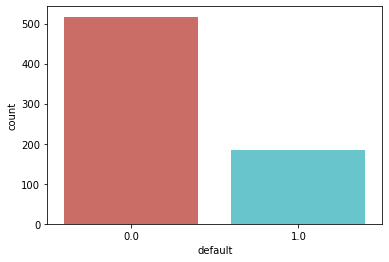

In [22]:
print(df['default'].value_counts())
sns.countplot(x='default',data=df, palette='hls')
plt.show()

In [23]:
#Analyze the impact of features on the target variable
def BivariateAnalysisPlot(segment_by):
    
    #boxplot
    plt.figure(figsize=(10,8))
    sns.boxplot(x = 'default', y = segment_by, data=df)
    plt.title("Box plot of "+segment_by)
    
    
    plt.show()

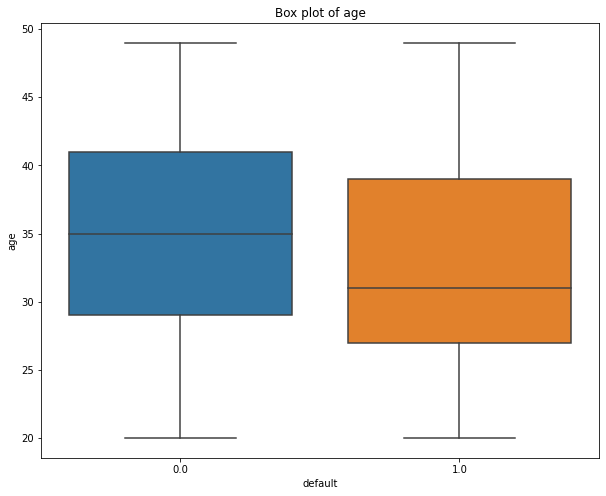

In [24]:
BivariateAnalysisPlot("age")

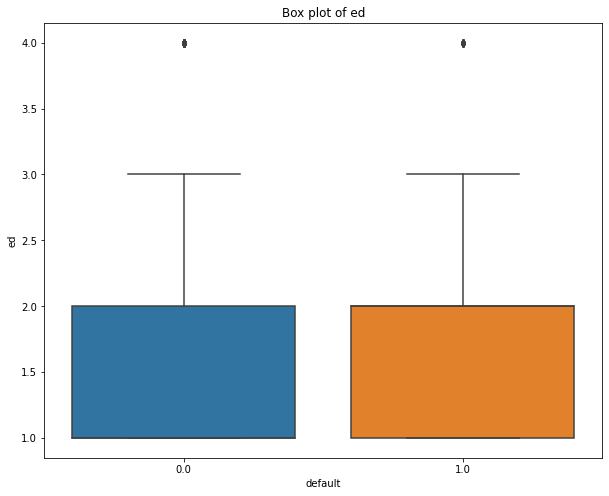

In [25]:
BivariateAnalysisPlot("ed")

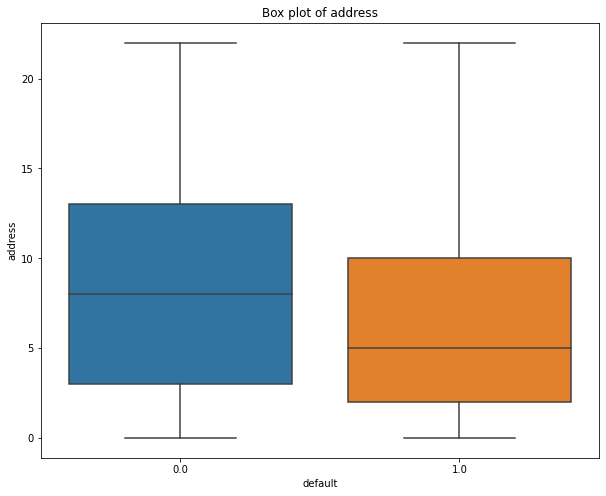

In [26]:
BivariateAnalysisPlot("address")

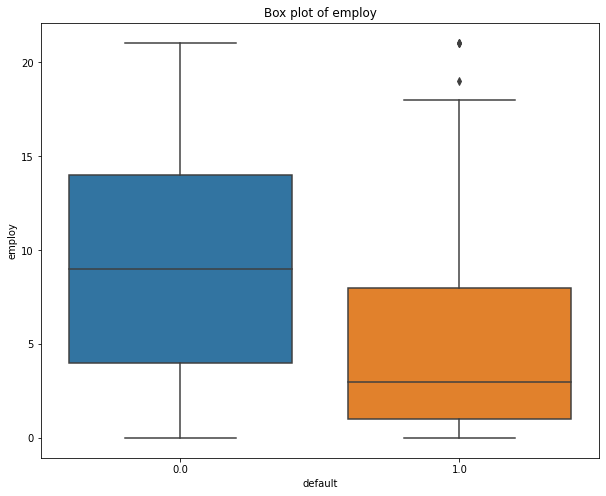

In [27]:
BivariateAnalysisPlot("employ")

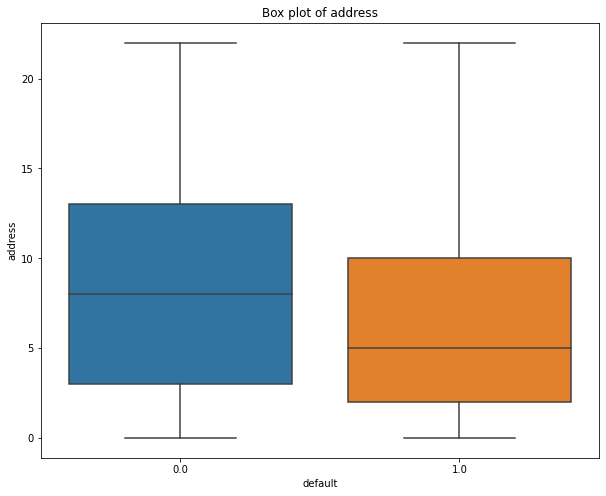

In [28]:
BivariateAnalysisPlot("address")

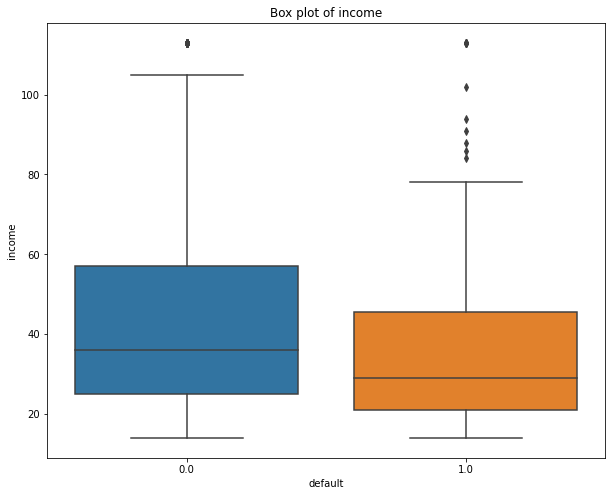

In [29]:
BivariateAnalysisPlot("income")

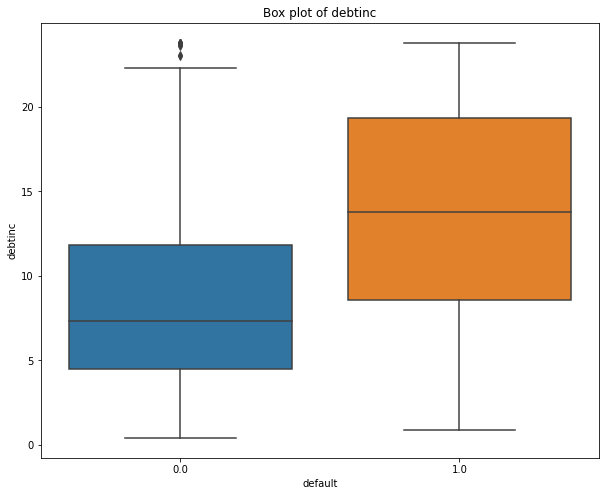

In [30]:
BivariateAnalysisPlot("debtinc")

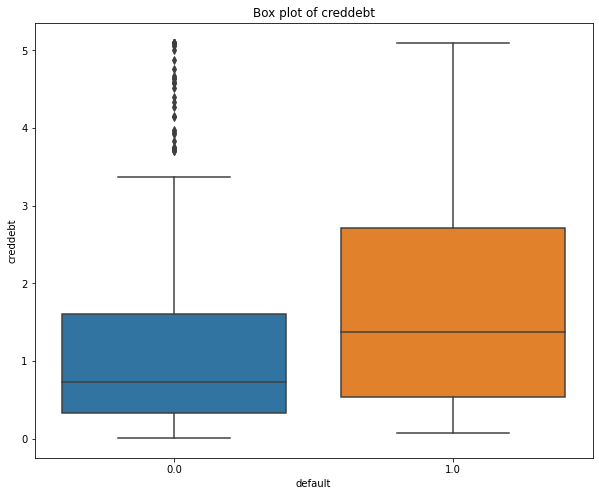

In [31]:
BivariateAnalysisPlot("creddebt")

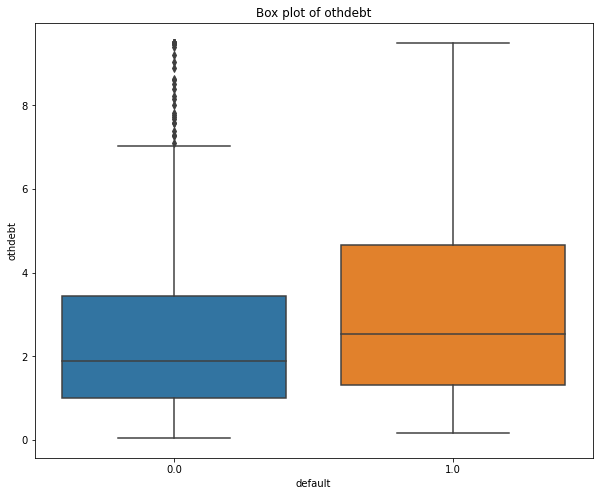

In [32]:
BivariateAnalysisPlot("othdebt")

In [33]:
df.shape

(700, 9)

### Observations
- There are 850 observations and 9 features in the data set
- Removed missing values
- Now data has 850 observations and 9 features
- Out of 850 customers data, 700 are existing customers and 150 are new customers
- The data is highly imbalanced
- From VIF check and T test, found out that the correlation between the variables is within the acceptable limits

## SMOTE

In [34]:
df['default'].value_counts()

0.0    517
1.0    183
Name: default, dtype: int64

In [35]:
X=df[['age','ed', 'employ', 'address', 'income', 'debtinc', 'creddebt','othdebt']]
y=df['default']
print('shape of x: {}'.format(X.shape))
print('shape of y: {}'.format(y.shape))

shape of x: (700, 8)
shape of y: (700,)


In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [37]:
!pip install imblearn

In [38]:
print("Before OverSampling, counts of default '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of default '0': {} \n".format(sum(y_train == 0))) 

from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 123) 
x_train_sm, y_train_sm = sm.fit_sample(x_train, y_train) 

print('After OverSampling, the shape of x_train: {}'.format(x_train_sm.shape)) 
print('After OverSampling, the shape of y_train: {} \n'.format(y_train_sm.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_sm == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_sm == 0)))

Before OverSampling, counts of default '1': 132
Before OverSampling, counts of default '0': 358 

After OverSampling, the shape of x_train: (716, 8)
After OverSampling, the shape of y_train: (716,) 

After OverSampling, counts of label '1': 358
After OverSampling, counts of label '0': 358


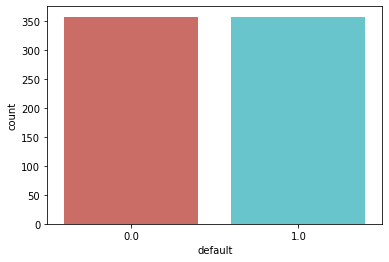

In [39]:
sns.countplot(y_train_sm,data=df, palette='hls')

## Model Selection

#### Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(x_train_sm,y_train_sm)

LogisticRegression(max_iter=1000)

In [41]:
featurecolumns = df.columns.difference(['default'])
featurecolumns

Index(['address', 'age', 'creddebt', 'debtinc', 'ed', 'employ', 'income',
       'othdebt'],
      dtype='object')

In [42]:
#Features and their coefficients

coefficient_df =  pd.DataFrame({'Features' : pd.Series(featurecolumns),
                        "Coefficients" : pd.Series(logreg.coef_[0])})
coefficient_df

,Features,Coefficients
0,address,0.010303
1,age,-0.174633
2,creddebt,-0.290669
3,debtinc,-0.100150
4,ed,0.015347
5,employ,0.097472
6,income,0.823825
7,othdebt,-0.047391


In [43]:
logreg.intercept_

array([-0.23284747])

In [44]:
logreg.score(x_test,y_test)

0.7428571428571429

In [45]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(logreg, x_train_sm, y_train_sm, cv=5)
print("Cross validation is",np.mean(score)*100)

Cross validation is 75.69638694638695


[[119  40]
 [ 14  37]]


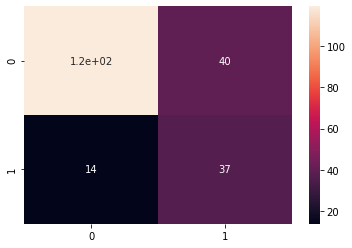

In [46]:
from sklearn.metrics import confusion_matrix
y_pred = logreg.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot=True)

In [47]:
from sklearn import metrics
prec_score = metrics.precision_score(y_test, y_pred)
print("Precision score :", round(prec_score,3))

Precision score : 0.481


In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.75      0.82       159
         1.0       0.48      0.73      0.58        51

    accuracy                           0.74       210
   macro avg       0.69      0.74      0.70       210
weighted avg       0.79      0.74      0.76       210



In [49]:
 print ('Best auc on training set: ', logreg.score(x_train_sm, y_train_sm))
 print ('Best auc on test set: ', logreg.score(x_test,y_test))

Best auc on training set:  0.7639664804469274
Best auc on test set:  0.7428571428571429


### Find the optimum cutoff value

In [50]:
predict_prob_df = pd.DataFrame(logreg.predict_proba(x_test))
predict_prob_df.head()

,0,1
0,0.981903,0.018097
1,0.994610,0.005390
2,0.097070,0.902930
3,0.508861,0.491139
4,0.660919,0.339081


In [51]:
#Predicting the test cases
test_pred_log = pd.DataFrame({'actual':y_test, 'predicted': y_pred})
test_pred_log = test_pred_log.reset_index()
test_pred_log.head()

,index,actual,predicted
0,57,0.0,0.0
1,478,0.0,0.0
2,597,1.0,1.0
3,689,0.0,0.0
4,647,0.0,0.0


In [52]:
test_pred_log = pd.concat([test_pred_log, predict_prob_df], axis = 1)
test_pred_log.columns = ['index', 'actual', 'predicted', 'default_0','default_1']

test_pred_log.head()

,index,actual,predicted,default_0,default_1
0,57,0.0,0.0,0.981903,0.018097
1,478,0.0,0.0,0.994610,0.005390
2,597,1.0,1.0,0.097070,0.902930
3,689,0.0,0.0,0.508861,0.491139
4,647,0.0,0.0,0.660919,0.339081


In [53]:
#find the auc score

auc_score = metrics.roc_auc_score(test_pred_log.actual, test_pred_log.default_1)
round(auc_score,4)

0.8159

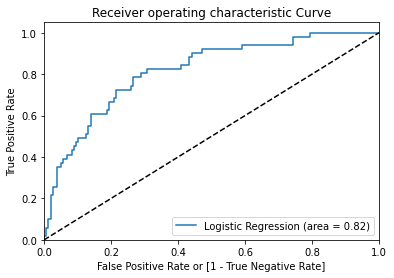

In [54]:
#Draw a roc curve

fpr, tpr, thresholds = metrics.roc_curve(test_pred_log.actual, test_pred_log.default_1, 
                                         drop_intermediate= False)


plt.plot(fpr, tpr , label = 'Logistic Regression (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic Curve')
plt.legend(loc="lower right")
plt.show()

### Precision - Recall Curve

In [55]:
y_score = logreg.predict_proba(x_test)[:, 1]
pd.DataFrame(y_score)

,0
0,0.018097
1,0.005390
2,0.902930
3,0.491139
4,0.339081
...,...
205,0.094278
206,0.167053
207,0.785367
208,0.055795


In [56]:
# Average precision score
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_score)
print(average_precision)


0.5875637908946542


Text(0.5, 1.0, 'Precision-Recall curve: AP=0.59')

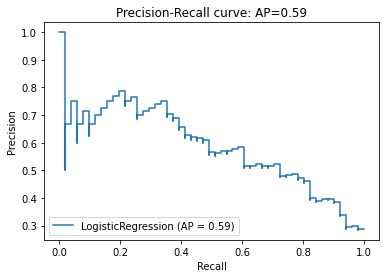

In [57]:
from sklearn.metrics import plot_precision_recall_curve

disp = plot_precision_recall_curve(logreg,x_test, y_test)
disp.ax_.set_title('Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

#### Cutoff would be optimum where specificity and sensitivity would be maximum for the given cutoff

In [58]:
##TPR - Sensitivity
##1-FPR - Specificity

i = np.arange(len(tpr))

roc_like_df = pd.DataFrame({'falsepositiverate' : pd.Series(fpr, index=i),'sensitivity' : pd.Series(tpr, index = i), 
              'specificity' : pd.Series(1-fpr, index = i),'cutoff' : pd.Series(thresholds, index = i)})
roc_like_df['total'] = roc_like_df['sensitivity'] + roc_like_df['specificity']

In [59]:
roc_like_df[roc_like_df['total']==roc_like_df['total'].max()]

,falsepositiverate,sensitivity,specificity,cutoff,total
82,0.264151,0.784314,0.735849,0.473647,1.520163


In [60]:
#Predicting with new cut-off probability
test_pred_log['new_labels'] = test_pred_log['default_1'].map( lambda x: 1 if x >= 0.473647 else 0 )

test_pred_log.head()

,index,actual,predicted,default_0,default_1,new_labels
0,57,0.0,0.0,0.981903,0.018097,0
1,478,0.0,0.0,0.994610,0.005390,0
2,597,1.0,1.0,0.097070,0.902930,1
3,689,0.0,0.0,0.508861,0.491139,1
4,647,0.0,0.0,0.660919,0.339081,0


In [61]:
#creating a confusion matrix

cm_logreg = metrics.confusion_matrix(test_pred_log.actual,
                                    test_pred_log.new_labels,labels = [1,0])
cm_logreg

array([[ 40,  11],
       [ 42, 117]], dtype=int64)

[[ 40  11]
 [ 42 117]]


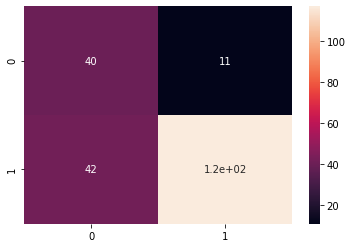

In [62]:
sns.heatmap(cm_logreg,annot=True)
print(cm_logreg)
plt.show()

In [63]:
#classification report 

print(metrics.classification_report(test_pred_log.actual,test_pred_log.new_labels))

              precision    recall  f1-score   support

         0.0       0.91      0.74      0.82       159
         1.0       0.49      0.78      0.60        51

    accuracy                           0.75       210
   macro avg       0.70      0.76      0.71       210
weighted avg       0.81      0.75      0.76       210



In [64]:
#intuitively the ability of the classifier to find all the positive samples

recall_score = metrics.recall_score(test_pred_log.actual, test_pred_log.new_labels)
print("recall_score:", round(recall_score , 3))

recall_score: 0.784


In [65]:
#find the overall accuracy of model

acc_score = metrics.accuracy_score(test_pred_log.actual,test_pred_log.new_labels)
print("Accuracy of model :", round(acc_score,3))

Accuracy of model : 0.748


## checking other models

In [66]:
#checking other models
def classify(model, x_train_sm, y_train_sm):
    model.fit(x_train_sm, y_train_sm)
    print("Accuracy is", model.score(x_test, y_test)*100)
    score = cross_val_score(model, x_train_sm, y_train_sm, cv=5)
    print("Cross validation is",np.mean(score)*100)

In [67]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
classify(model, x_train_sm, y_train_sm)

Accuracy is 74.28571428571429
Cross validation is 75.69638694638695


In [68]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=123)
classify(model, x_train_sm, y_train_sm)

Accuracy is 77.61904761904762
Cross validation is 82.5437062937063


In [69]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, x_train_sm, y_train_sm)

Accuracy is 69.52380952380952
Cross validation is 75.56623931623932


In [70]:
from sklearn.linear_model import SGDClassifier
model = SGDClassifier()
classify(model, x_train_sm, y_train_sm)

Accuracy is 53.80952380952381
Cross validation is 68.00310800310801


## Hypertuning Random Forect Classifier.

In [71]:
#hypertuning
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(RandomForestClassifier(random_state=123), {
    'n_estimators': [1,5,10,20,50,70,100,120,150,200,220],
    'max_depth': [4, 7, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}, cv=5, return_train_score=False)
clf.fit(x_train_sm, y_train_sm)
clf.cv_results_

{'mean_fit_time': array([0.0076005 , 0.01740103, 0.02900167, 0.05180287, 0.12040696,
        0.18281045, 0.24901423, 0.28021598, 0.34881992, 0.46182652,
        0.50742903, 0.00740051, 0.01680102, 0.0286016 , 0.05100288,
        0.12000685, 0.16580954, 0.23521352, 0.27961602, 0.37922168,
        0.46342654, 0.50822916, 0.00740037, 0.01680102, 0.02840157,
        0.05100298, 0.11960678, 0.16520944, 0.23481345, 0.28421621,
        0.35342026, 0.49622846, 0.52162981, 0.00780039, 0.01640091,
        0.02840157, 0.05100298, 0.12000685, 0.1656096 , 0.23861356,
        0.2900167 , 0.36022053, 0.48742785, 0.54783149, 0.01160064,
        0.02440138, 0.03900223, 0.07160411, 0.14140816, 0.18401065,
        0.24021373, 0.28701634, 0.35662041, 0.47462721, 0.52343006,
        0.00800047, 0.01740103, 0.02860169, 0.05240302, 0.12240696,
        0.16740961, 0.25881472, 0.29841704, 0.35142016, 0.46682658,
        0.51042924, 0.00840054, 0.01720099, 0.0286016 , 0.05120292,
        0.12080698, 0.16660957,

In [72]:
df1 = pd.DataFrame(clf.cv_results_)
df1

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007600,4.897457e-04,0.003600,4.899209e-04,4,1,2,1,"{'max_depth': 4, 'min_samples_leaf': 1, 'min_s...",0.618056,0.643357,0.755245,0.685315,0.741259,0.688646,0.053383,487
1,0.017401,4.899403e-04,0.004200,4.000425e-04,4,1,2,5,"{'max_depth': 4, 'min_samples_leaf': 1, 'min_s...",0.743056,0.748252,0.720280,0.713287,0.804196,0.745814,0.032038,448
2,0.029002,9.536743e-08,0.005400,4.898624e-04,4,1,2,10,"{'max_depth': 4, 'min_samples_leaf': 1, 'min_s...",0.763889,0.706294,0.776224,0.832168,0.783217,0.772358,0.040364,418
3,0.051803,1.166261e-03,0.006800,3.999710e-04,4,1,2,20,"{'max_depth': 4, 'min_samples_leaf': 1, 'min_s...",0.791667,0.720280,0.790210,0.825175,0.776224,0.780711,0.034233,369
4,0.120407,1.019982e-03,0.012201,3.998995e-04,4,1,2,50,"{'max_depth': 4, 'min_samples_leaf': 1, 'min_s...",0.791667,0.755245,0.783217,0.825175,0.755245,0.782110,0.026041,351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,0.281216,4.700649e-02,0.025001,6.033579e-03,30,5,10,100,"{'max_depth': 30, 'min_samples_leaf': 5, 'min_...",0.798611,0.783217,0.797203,0.846154,0.783217,0.801680,0.023191,276
491,0.304617,1.220891e-02,0.025001,1.168008e-07,30,5,10,120,"{'max_depth': 30, 'min_samples_leaf': 5, 'min_...",0.805556,0.783217,0.797203,0.860140,0.783217,0.805866,0.028449,212
492,0.371421,2.577003e-03,0.030402,4.898430e-04,30,5,10,150,"{'max_depth': 30, 'min_samples_leaf': 5, 'min_...",0.791667,0.776224,0.811189,0.860140,0.783217,0.804487,0.030192,243
493,0.547631,4.885607e-02,0.040402,1.496701e-03,30,5,10,200,"{'max_depth': 30, 'min_samples_leaf': 5, 'min_...",0.791667,0.776224,0.818182,0.874126,0.783217,0.808683,0.035678,151


In [73]:
df1[['param_max_depth', 'param_min_samples_leaf', 'param_min_samples_split', 'param_n_estimators','mean_test_score']]

,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,mean_test_score
0,4,1,2,1,0.688646
1,4,1,2,5,0.745814
2,4,1,2,10,0.772358
3,4,1,2,20,0.780711
4,4,1,2,50,0.782110
...,...,...,...,...,...
490,30,5,10,100,0.801680
491,30,5,10,120,0.805866
492,30,5,10,150,0.804487
493,30,5,10,200,0.808683


In [74]:
clf.best_params_

{'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 70}

In [75]:
clf.best_score_

0.8310217560217561

In [76]:
clf.score(x_test,y_test)

0.7761904761904762

[[131  28]
 [ 19  32]]


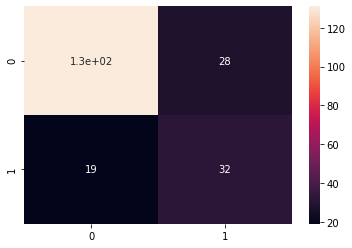

In [77]:
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot=True)

In [78]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.82      0.85       159
         1.0       0.53      0.63      0.58        51

    accuracy                           0.78       210
   macro avg       0.70      0.73      0.71       210
weighted avg       0.79      0.78      0.78       210



In [79]:
 print ('Best auc on training set: ', clf.best_score_)
 print ('Best auc on test set: ', clf.score(x_test, y_test))

Best auc on training set:  0.8310217560217561
Best auc on test set:  0.7761904761904762


## Precision-Recall curve

In [80]:
y_score = clf.predict_proba(x_test)[:, 1]
pd.DataFrame(y_score)

,0
0,0.000000
1,0.128571
2,0.843434
3,0.268013
4,0.230330
...,...
205,0.155085
206,0.258838
207,0.627395
208,0.069524


In [81]:
# Average precision score
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_score)
print(average_precision)

0.5462141841872593


Text(0.5, 1.0, 'Precision-Recall curve: AP=0.55')

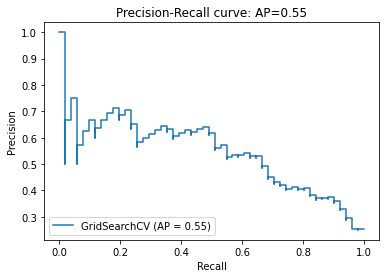

In [82]:
from sklearn.metrics import plot_precision_recall_curve

disp = plot_precision_recall_curve(clf,x_test, y_test)
disp.ax_.set_title('Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

### ROC-AUC Curve

In [83]:
from sklearn.metrics import roc_auc_score
roc_auc_score = roc_auc_score(y_test, y_score)
roc_auc_score

0.788444937723517

In [84]:
from sklearn.metrics import roc_curve
fpr,tpr, threshold = roc_curve(y_test, y_score)

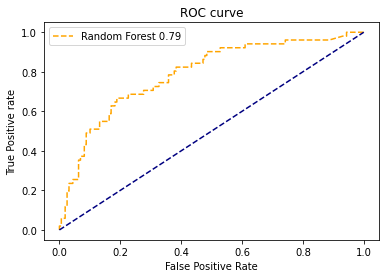

In [85]:
# plot roc curves
plt.plot(fpr, tpr, linestyle='--',color='orange', label='{} {}'.format('Random Forest',np.round(roc_auc_score,2)))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.show()

### Random Forest

              precision    recall  f1-score   support

         0.0       0.87      0.82      0.85       159
         1.0       0.53      0.63      0.58        51

    accuracy                           0.78       210

### Logistic Regression

              precision    recall  f1-score   support

         0.0       0.91      0.74      0.82       159
         1.0       0.49      0.78      0.60        51

    accuracy                           0.75       210

## 	Based on the F1-score, logistic model with F1 score of 0.60 is giving better results than random forest model with F1 score of 0.58. So we will use the logistic regression model to predict if the customer default or not.

In [86]:
#checking model
def default_pred(age,ed,employ,address,income,debtinc,creddebt,othdebt):
     input_dict = {'age' : age,
               "ed" : ed,
               "employ" : employ,
               "address" : address,
                "income" : income,
              "debtinc" : debtinc,
              "creddebt" : creddebt,
                "othdebt" : othdebt}
     input_df = pd.DataFrame([input_dict])
     predict1 = logreg.predict_proba(input_df)[:, 1]
     if predict1 >= 0.473647:
        c="Default"
     else: 
        c="No default"
    
     return c
  

default_pred(24,1,3,4,19,23.8,1.3,3.2)

'Default'

In [87]:
x_test.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt
57,39,2,16.00,13,69,2.4,1.061496,0.594504
478,49,2,21.05,21,113,11.5,0.820870,9.501648
597,32,2,5.00,0,28,14.8,2.594144,1.549856
689,30,1,4.00,2,18,10.7,0.227268,1.698732
647,27,1,6.00,6,43,4.9,0.882833,1.224167


In [88]:
# saving the model 
import pickle 
pickle_out = open("model.pkl", mode = "wb") 
pickle.dump(logreg, pickle_out) 
pickle_out.close()